### 8.Methods
1. Imputation
2. Outliers handling

### Imputation

In [1]:
import pandas as pd
import numpy as np

In [2]:
dic = {'name':['Ali',np.nan,'Ali',np.nan,'Ahmad','Zafar', 'Murari'],
       'home':['HFD','FFF',np.nan,'DDD',np.nan,'GGG',np.nan],
       'No':[234,655,543,765,np.nan,np.nan,987]}
df = pd.DataFrame(dic)
df

,name,home,No
0,Ali,HFD,234.0
1,NaN,FFF,655.0
2,Ali,NaN,543.0
3,NaN,DDD,765.0
4,Ahmad,NaN,NaN
5,Zafar,GGG,NaN
6,Murari,NaN,987.0


In [3]:
print(df.isnull().sum())
print("---------------")
df.loc[df.isnull().sum()]

name    2
home    3
No      2
dtype: int64
---------------


,name,home,No
2,Ali,NaN,543.0
3,NaN,DDD,765.0
2,Ali,NaN,543.0


In [4]:
df.dropna( thresh=1, subset=['name'])

,name,home,No
0,Ali,HFD,234.0
2,Ali,NaN,543.0
4,Ahmad,NaN,NaN
5,Zafar,GGG,NaN
6,Murari,NaN,987.0


In [5]:
df

,name,home,No
0,Ali,HFD,234.0
1,NaN,FFF,655.0
2,Ali,NaN,543.0
3,NaN,DDD,765.0
4,Ahmad,NaN,NaN
5,Zafar,GGG,NaN
6,Murari,NaN,987.0


In [6]:
# 1. Method od droping rows which have higher thresh rate ( each row wise) 
threshold = 0.3
print(df.isnull().mean(axis=1))  # 2(null)/6(total)
print("----------------")
print(df.loc[df.isnull().mean(axis=1) < threshold],"\n -----------------")
# 2.
print(df.dropna(thresh=3))

0    0.000000
1    0.333333
2    0.333333
3    0.333333
4    0.666667
5    0.333333
6    0.333333
dtype: float64
----------------
  name home     No
0  Ali  HFD  234.0 
 -----------------
  name home     No
0  Ali  HFD  234.0


In [17]:
df.columns[df.isnull().mean() < threshold]

Index(['name', 'No'], dtype='object')

In [88]:
# 1. method of droping columns with null values
print(df.isnull().mean(),"\n---------------")
print(df.isnull().mean() < threshold,"\n---------------")
print(df[df.columns[df.isnull().mean() < threshold]],"\n---------------1st-method")

# 2. No-second method

name    0.285714
home    0.428571
No      0.285714
dtype: float64 
---------------
name     True
home    False
No       True
dtype: bool 
---------------
     name     No
0     Ali  234.0
1     NaN  655.0
2     Ali  543.0
3     NaN  765.0
4   Ahmad    NaN
5   Zafar    NaN
6  Murari  987.0 
---------------1st-method


In [4]:
import numpy as np
l = [1,2,3,3,4,5]
np.mean(l)

3.0

In [96]:
# Filing all missing values with column mdedians ( its better than mean cause of outliers)
#print(df.fillna(df.median(),"\n-----------------"))
print(df['name'].mode(),"This is mode same as most geater values-counts()")
print(df['name'].value_counts(),"\n----------------")
print(df['name'].fillna(df['name'].value_counts().idxmax()))

0    Ali
dtype: object This is mode same as most geater values-counts()
Ali       2
Zafar     1
Murari    1
Ahmad     1
Name: name, dtype: int64 
----------------
0       Ali
1       Ali
2       Ali
3       Ali
4     Ahmad
5     Zafar
6    Murari
Name: name, dtype: object


In [97]:
x = df['name'].value_counts().to_dict()
df['name'].replace(x.keys(),x.values())

0    2.0
1    NaN
2    2.0
3    NaN
4    1.0
5    1.0
6    1.0
Name: name, dtype: float64

### Outlier Detection

In [104]:
df['No']

0    234.0
1    655.0
2    543.0
3    765.0
4      NaN
5      NaN
6    987.0
Name: No, dtype: float64

In [103]:
# Either detect by box plot , STD() or percentile.
df['No'].describe()

count      5.000000
mean     636.800000
std      278.591457
min      234.000000
25%      543.000000
50%      655.000000
75%      765.000000
max      987.000000
Name: No, dtype: float64

In [102]:
x = df['No'].quantile(.95)
y = df['No'].quantile(.05)
print(x)
print(y)
df[(df['No'] < x) & (df['No'] > y)]

942.5999999999999
295.8


,name,home,No
1,NaN,FFF,655.0
2,Ali,NaN,543.0
3,NaN,DDD,765.0


In [107]:
# Caping the outliers , with max and min values for max and min outliers
df.loc[df['No'] > x, 'No'] = x
df.loc[df['No'] < y, 'No'] = y
df['No']

0    295.8
1    655.0
2    543.0
3    765.0
4      NaN
5      NaN
6    942.6
Name: No, dtype: float64

In [1]:
import numpy as np

4.850000000000006
8.829637591656866
-2.574999999999997
12.275000000000007


array([-10. ,  -9.1,  -8.2,  -7.3,  -6.4,  -5.5,  -4.6,  -3.7,  -2.8,
        -1.9,  -1. ,  -0.1,   0.8,   1.7,   2.6,   3.5,   4.4,   5.3,
         6.2,   7.1,   8. ,   8.9,   9.8,  10.7,  11.6,  12.5,  13.4,
        14.3,  15.2,  16.1,  17. ,  17.9,  18.8,  19.7])

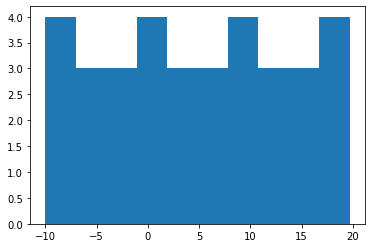

In [5]:
l1 = np.arange(-10,20,step=0.9)
print(np.mean(l1))
print(np.std(l1))
lower_b , upper_b = np.percentile(l1,[25,75])
print(lower_b)
print(upper_b)
import matplotlib.pyplot as plt
plt.hist(l1)
l1